In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data = pd.read_csv('./healthcare-dataset-stroke-data.csv',sep = ',',header = 0) 

In [46]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [47]:
data.shape

(5110, 12)

In [48]:
#check if data type is correct
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [49]:
#check duplicated data
data.duplicated().sum()

0

In [50]:
#drop id column
data.drop('id', inplace=True, axis=1)

In [51]:
#check the variable in each column
for col in data.columns:
    print(data[col].value_counts())
    print("-"*15)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
---------------
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
---------------
0    4612
1     498
Name: hypertension, dtype: int64
---------------
0    4834
1     276
Name: heart_disease, dtype: int64
---------------
Yes    3353
No     1757
Name: ever_married, dtype: int64
---------------
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
---------------
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
---------------
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64
---------------
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.

In [52]:
#replace the unknown in smoking status to it median values
data["smoking_status"].replace("Unknown", data["smoking_status"].mode().values[0], inplace=True)

In [53]:
#check if there is null in data
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [54]:
# Calculating the percentage of missing values in each column is often more meaningful to me
print('PERCENTAGE OF MISSING VALUES IN EACH COLUMN:\n')
for col in data.columns:
    missing = np.mean(data[col].isnull())
    print('{}:  {:.2f}%'.format(col, missing*100))

PERCENTAGE OF MISSING VALUES IN EACH COLUMN:

gender:  0.00%
age:  0.00%
hypertension:  0.00%
heart_disease:  0.00%
ever_married:  0.00%
work_type:  0.00%
Residence_type:  0.00%
avg_glucose_level:  0.00%
bmi:  3.93%
smoking_status:  0.00%
stroke:  0.00%


In [55]:
# Showing rows where values for bmi are missing
missing_bmi=data[pd.isnull(data.bmi)]
missing_bmi.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,never smoked,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,never smoked,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,never smoked,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,never smoked,1


In [56]:
#replace null data with median
data["bmi"].fillna(data["bmi"].median(), inplace=True)

In [57]:
#describe the data
data.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [64]:
#add bmi status column
criteria = [data['bmi'].between(0, 18.5), data['bmi'].between(18.6, 24.9), data['bmi'].between(25, 100)]
values = ['underweight', 'normal', 'overweight']

data['bmi_status'] = np.select(criteria, values, 0)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,overweight
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,overweight
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,overweight
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,overweight
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0,overweight
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,overweight
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,overweight
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,overweight


# Univariate

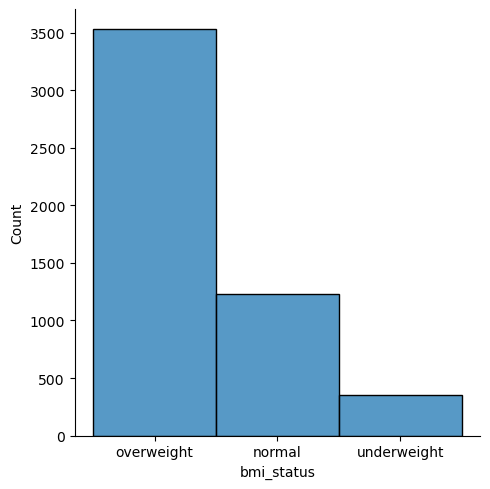

In [65]:
sns.displot(data['bmi_status'])
plt.show()

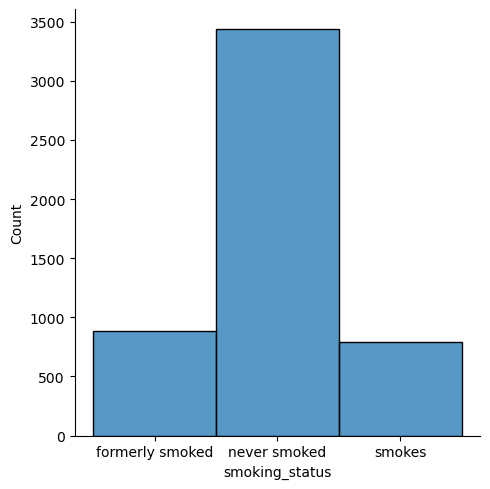

In [60]:
sns.displot(data['smoking_status'])
plt.show()

# Bivariate

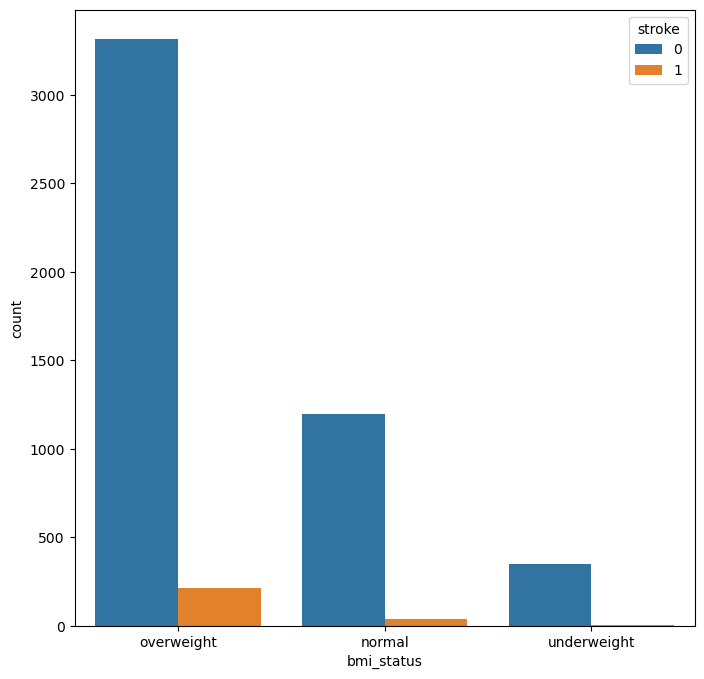

In [66]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='stroke',x='bmi_status',data=data)
plt.show()

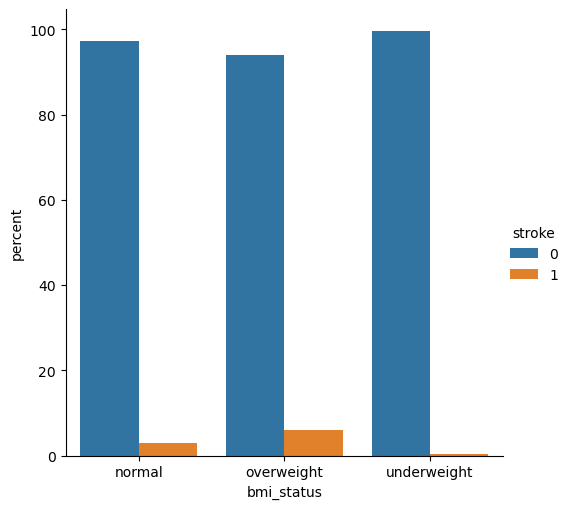

In [73]:
#normalized plot for bmi and stroke
x,y = 'bmi_status', 'stroke'

(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.show()

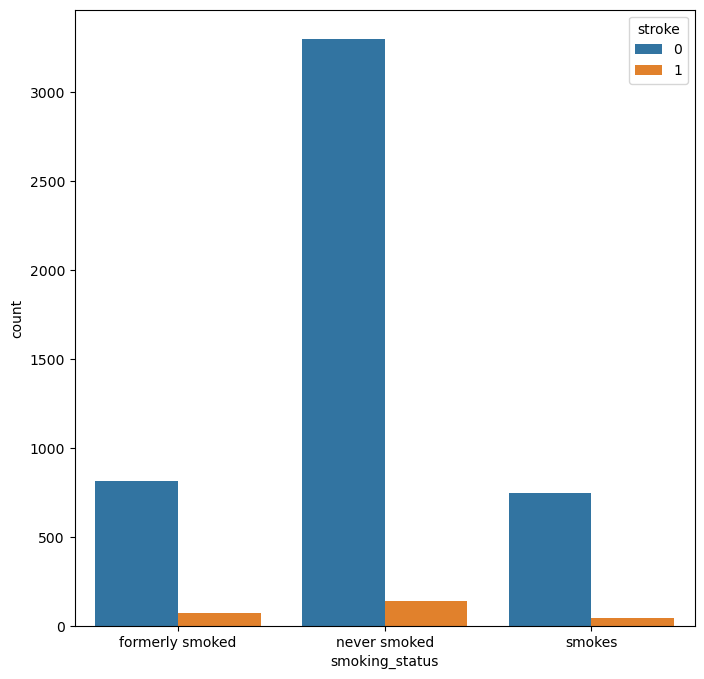

In [69]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='stroke',x='smoking_status',data=data)
plt.show()

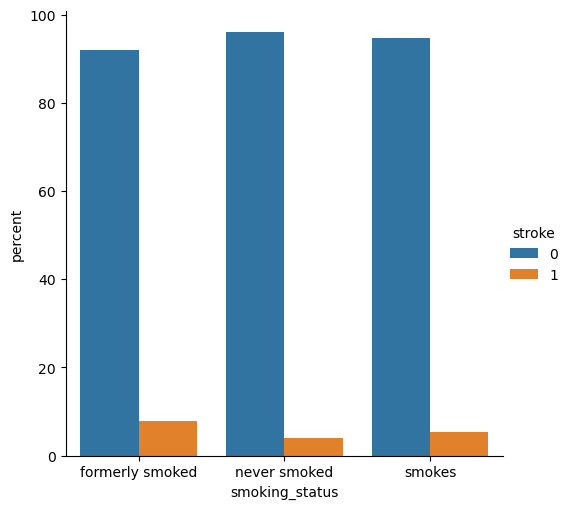

In [74]:
#normalized plot for smoking & stroke
x,y = 'smoking_status', 'stroke'

(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.show()

# Multivariate

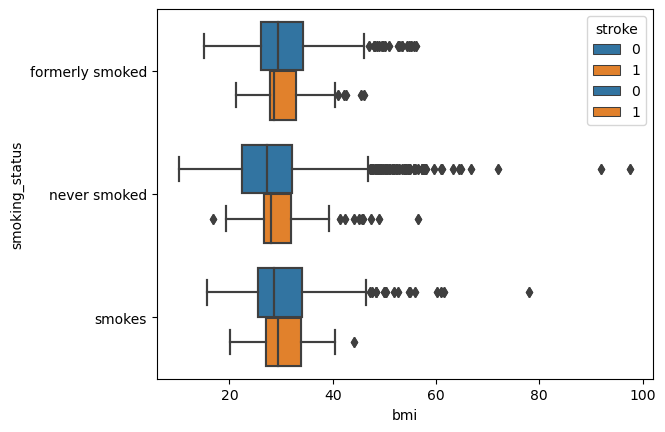

In [109]:
sns.boxplot(x="bmi",y="smoking_status",hue="stroke",data=data)
plt.show()